In [1]:
%matplotlib inline
import pyemma,mdtraj
import pandas,subprocess
import itertools,msmtools,seaborn
import matplotlib.pyplot as plt
from matplotlib.pylab import *
from IPython.display import display_html
seaborn.set_style("white")

In [2]:
pyemma.__version__

'2.5.7'

In [3]:


# Load files and topology
stept=0.01 #ns
exclude=[6, 14, 15]
trajs=[i+1 for i in range(26) if i+1 not in exclude]
fls = [f'../../100_clean_traj/{i}_2dri-RIP_nowat.xtc'  for i in range(1,17) if i not in exclude]
fls += [f'../../100_clean_traj/{i}_2dri-RIP_backrubed_nowat.xtc' for i in range(1,11)]
#fls += [f'../../100_clean_traj/1_apo_1urp_nowat_em.xtc']

crd=mdtraj.load('../1_2dri-RIP_nowat.gro')
top=crd.topology
print(top)

<mdtraj.Topology with 1 chains, 272 residues, 4080 atoms, 4013 bonds>


/home/chenlin/anaconda3/envs/pyemma/lib/python3.9/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (ASP, LYS)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/home/chenlin/anaconda3/envs/pyemma/lib/python3.9/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (THR, ASP)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/home/chenlin/anaconda3/envs/pyemma/lib/python3.9/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (ILE, THR)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/home/chenlin/anaconda3/envs/pyemma/lib/python3.9/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (ALA, ILE)
  warning

In [4]:
# Feature selection
feat = pyemma.coordinates.featurizer(crd)
#for ri in [89, 90, 141, 15, 16, 164, 215, 190, 235]:
    #    feat.add_backbone_torsions(selstr='residue %i'%ri, cossin=True)
#    feat.add_sidechain_torsions(f'residue {ri}', deg=True, cossin=True, which='all')
feat.add_backbone_torsions()
feat.describe()[:10]


['PHI 0 ASP 2',
 'PSI 0 LYS 1',
 'PHI 0 THR 3',
 'PSI 0 ASP 2',
 'PHI 0 ILE 4',
 'PSI 0 THR 3',
 'PHI 0 ALA 5',
 'PSI 0 ILE 4',
 'PHI 0 LEU 6',
 'PSI 0 ALA 5']

In [5]:
fls

['../../100_clean_traj/1_2dri-RIP_nowat.xtc',
 '../../100_clean_traj/2_2dri-RIP_nowat.xtc',
 '../../100_clean_traj/3_2dri-RIP_nowat.xtc',
 '../../100_clean_traj/4_2dri-RIP_nowat.xtc',
 '../../100_clean_traj/5_2dri-RIP_nowat.xtc',
 '../../100_clean_traj/7_2dri-RIP_nowat.xtc',
 '../../100_clean_traj/8_2dri-RIP_nowat.xtc',
 '../../100_clean_traj/9_2dri-RIP_nowat.xtc',
 '../../100_clean_traj/10_2dri-RIP_nowat.xtc',
 '../../100_clean_traj/11_2dri-RIP_nowat.xtc',
 '../../100_clean_traj/12_2dri-RIP_nowat.xtc',
 '../../100_clean_traj/13_2dri-RIP_nowat.xtc',
 '../../100_clean_traj/16_2dri-RIP_nowat.xtc',
 '../../100_clean_traj/1_2dri-RIP_backrubed_nowat.xtc',
 '../../100_clean_traj/2_2dri-RIP_backrubed_nowat.xtc',
 '../../100_clean_traj/3_2dri-RIP_backrubed_nowat.xtc',
 '../../100_clean_traj/4_2dri-RIP_backrubed_nowat.xtc',
 '../../100_clean_traj/5_2dri-RIP_backrubed_nowat.xtc',
 '../../100_clean_traj/6_2dri-RIP_backrubed_nowat.xtc',
 '../../100_clean_traj/7_2dri-RIP_backrubed_nowat.xtc',
 '../

In [6]:
feat_data=pyemma.coordinates.source(fls,features=feat)

Obtaining file info:   0%|          | 0/23 [00:00<?, ?it/s]

In [7]:
tica = pyemma.coordinates.tica(feat_data, lag=500, dim=3, kinetic_map=True)
tica_out=tica.get_output()
tica_cnc=np.concatenate(tica_out)

calculate covariances:   0%|          | 0/23 [00:00<?, ?it/s]

getting output of TICA:   0%|          | 0/23 [00:00<?, ?it/s]

In [8]:
tica.cumvar[:10]

array([0.08492267, 0.16321691, 0.23808036, 0.31141291, 0.37590462,
       0.43795101, 0.48546728, 0.52655226, 0.56536672, 0.59908376])

In [9]:
len(tica_out)

23

In [10]:
tica_out[0].shape

(20001, 3)

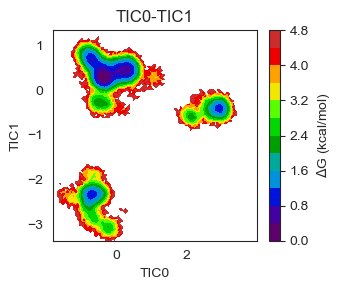

In [11]:
# Plot free energy landscape
fig,ax=plt.subplots(figsize=(3.5,3))
pyemma.plots.plot_free_energy(tica_cnc[:,0],tica_cnc[:,1],ax=ax,cbar=True,kT=0.6,
                              cbar_label=r"$\Delta$G (kcal/mol)",ncountours=12)
ax.set_title("TIC0-TIC1")
ax.set_xlabel("TIC0")
ax.set_ylabel("TIC1")
#ax.set_xlim((-1.2,2.2))
#ax.set_ylim((-2,2))
fig.tight_layout()

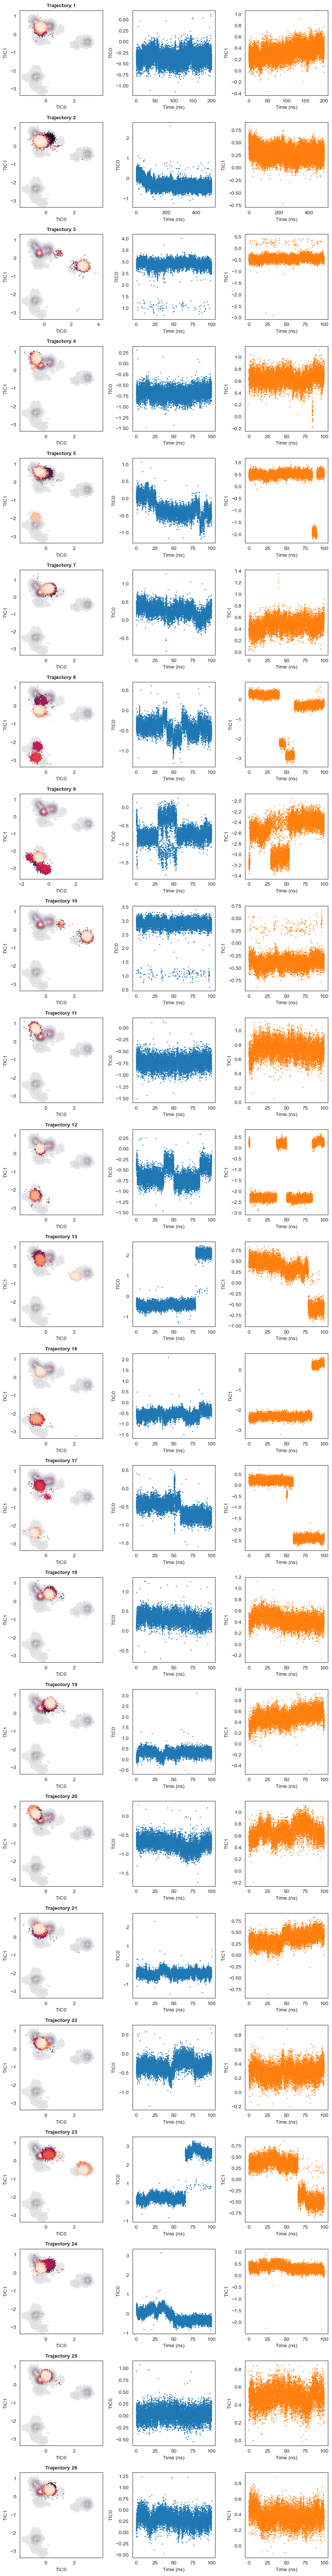

In [13]:
# Plot trajectories on top of the TIC map
fig,ax=plt.subplots(len(trajs),3,figsize=(3*3,3*len(trajs)))
for i,tra in enumerate(trajs):
    ax[i,0].set_title("Trajectory {}".format(tra),size=10,fontweight="bold")
    pyemma.plots.plot_density(tica_cnc[:,0],tica_cnc[:,1],ax=ax[i,0],cbar=False,alpha=0.1)
    ax[i,0].scatter(tica_out[i][:,0],tica_out[i][:,1],s=0.5,c=np.linspace(0,1,len(tica_out[i])))
    ax[i,0].set_xlabel("TIC0")
    ax[i,0].set_ylabel("TIC1")
    #ax[i,0].set_xlim((-1.2,2.2))
    #ax[i,0].set_ylim((-2,2))
    #######
    ptime=[k*stept for k in range(len(tica_out[i]))]
    ax[i,1].scatter(ptime,tica_out[i][:,0],s=1,c="C0")
    ax[i,1].set_xlabel("Time (ns)")
    ax[i,1].set_ylabel("TIC0")
   # ax[i,1].set_ylim((-1.2,2.2))
    #######
    ax[i,2].scatter(ptime,tica_out[i][:,1],s=1,c="C1")
    ax[i,2].set_xlabel("Time (ns)")
    ax[i,2].set_ylabel("TIC1")
    #ax[i,2].set_ylim((-2,2))
fig.tight_layout()

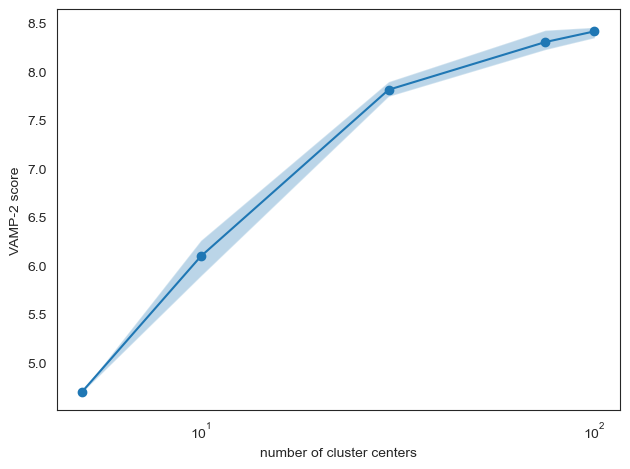

In [14]:
from pyemma.util.contexts import settings

n_clustercenters = [5, 10, 30, 75, 100, 200]

scores = np.zeros((len(n_clustercenters), 5))
for n, k in enumerate(n_clustercenters):
    for m in range(5):
        with pyemma.util.contexts.settings(show_progress_bars=False):
            _cl = pyemma.coordinates.cluster_kmeans(
                tica_out, k=k, max_iter=50, stride=50)
            _msm = pyemma.msm.estimate_markov_model(_cl.dtrajs, 5)
            scores[n, m] = _msm.score_cv(
                _cl.dtrajs, n=1, score_method='VAMP2', score_k=min(10, k))

fig, ax = plt.subplots()
lower, upper = pyemma.util.statistics.confidence_interval(scores.T.tolist(), conf=0.9)
ax.fill_between(n_clustercenters, lower, upper, alpha=0.3)
ax.plot(n_clustercenters, np.mean(scores, axis=1), '-o')
ax.semilogx()
ax.set_xlabel('number of cluster centers')
ax.set_ylabel('VAMP-2 score')
fig.tight_layout()

In [15]:
# k-means clustering
km=pyemma.coordinates.cluster_kmeans(tica_out,k=100, max_iter=100)

initialize kmeans++ centers:   0%|          | 0/100 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/100 [00:00<?, ?it/s]

In [16]:
dtrajs_concatenated = np.concatenate(km.dtrajs)

getting output of KmeansClustering:   0%|          | 0/23 [00:00<?, ?it/s]

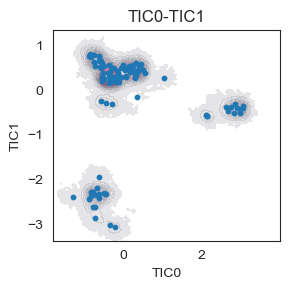

In [17]:
# Plot cluster centers on TIC maps
fig,ax=plt.subplots(figsize=(3,3))
pyemma.plots.plot_density(tica_cnc[:,0],tica_cnc[:,1],ax=ax,cbar=False,alpha=0.1)
ax.scatter(km.clustercenters[:,0],km.clustercenters[:,1],c="C0",s=10)
ax.set_title("TIC0-TIC1")
ax.set_xlabel("TIC0")
ax.set_ylabel("TIC1")
fig.tight_layout()

In [18]:
# Compute timescales
its=pyemma.msm.its(km.dtrajs,lags=[1,100,250,350,500,600,750,1000, 2000],nits=10,errors="bayes")

estimating BayesianMSM:   0%|          | 0/9 [00:00<?, ?it/s]

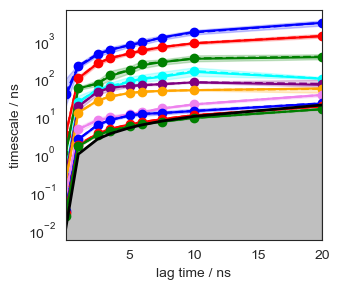

In [19]:
# Plot timescales
fig,ax=plt.subplots(figsize=(3.5,3))
pyemma.plots.plot_implied_timescales(its,dt=stept,ax=ax,units="ns",xlog=False,ylog=True)
fig.tight_layout()

In [20]:
# Build MSM
msm=pyemma.msm.bayesian_markov_model(km.dtrajs,lag=500,dt_traj="{:1.3f} ns".format(stept),conf=0.95)
mm = pyemma.msm.estimate_markov_model(km.dtrajs,lag=500,dt_traj="{:1.3f} ns".format(stept))
print("Active state fraction: {:1.2f}".format(msm.active_state_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[107]: compute stat. inefficiencies:   0%|          | 0/3900 [00…

pyemma.msm.estimators.bayesian_msm.BayesianMSM[107]: Sampling MSMs:   0%|          | 0/100 [00:00<?, ?it/s]

Active state fraction: 1.00


<AxesSubplot:>

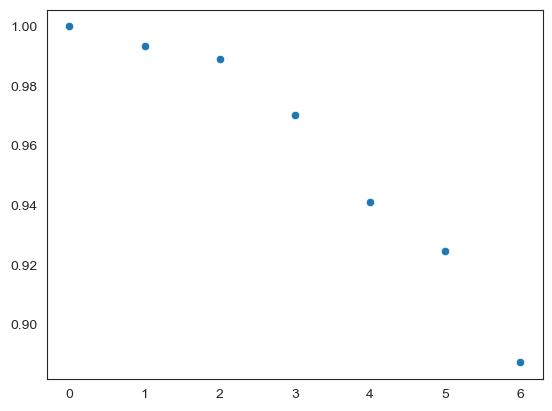

In [23]:
seaborn.scatterplot(msm.eigenvalues()[:7])

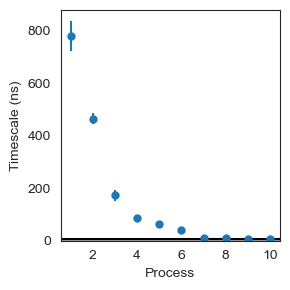

In [24]:
# Plot timescale separation
nits=its.nits
t_mean=msm.sample_mean("timescales",k=nits)
t_std=msm.sample_std("timescales",k=nits)

fig,ax=plt.subplots(figsize=(3,3))
ax.errorbar(range(1,nits+1),t_mean,yerr=t_std,fmt=".",markersize=10)
ax.axhline(msm.lag*stept,lw=1.5,color="k")
ax.axhspan(0,msm.lag*stept,alpha=0.3,color="k")
ax.set_xlabel("Process")
ax.set_ylabel("Timescale (ns)")
ax.set_ylim(bottom=0)
fig.tight_layout()

In [27]:
# Coarse grain the model
nstates=3
msm.pcca(nstates)

# Compute MFPTs
mfpt=[]
for i in range(msm.n_metastable):
    mfpt.append([])
    for j in range(msm.n_metastable):
        if i!=j:
            mean=msm.sample_mean("mfpt",msm.metastable_sets[i],msm.metastable_sets[j])
            stdv=msm.sample_std("mfpt",msm.metastable_sets[i],msm.metastable_sets[j])
            conf=msm.sample_conf("mfpt",msm.metastable_sets[i],msm.metastable_sets[j])
            mfpt[i].append(r"{:1.1f} $\pm$ {:1.1f}  [{:1.1f}|{:1.1f}]".format(mean,stdv,conf[0],conf[1]))
        else:
            mfpt[i].append("")

# Compute populations with a CRISP partition
cpop=np.round([msm.pi[state].sum() for state in msm.metastable_sets],2)

# Compute populations with memberships
mpop=np.round([(msm.pi*state).sum() for state in msm.metastable_memberships.T],2)

# Plot dataframes side by side
df1=pandas.DataFrame(cpop,index=["State {}".format(i) for i in range(msm.n_metastable)],
                     columns=[r"$\pi$$_{crisp}$"]).to_html()
df2=pandas.DataFrame(mpop,index=["" for i in range(msm.n_metastable)],
                     columns=[r"$\pi$$_{memb}$"]).to_html()
df3=pandas.DataFrame(mfpt,index=["" for i in range(msm.n_metastable)],
                     columns=[r"state$\to${} (ns)".format(i) for i in range(msm.n_metastable)]).to_html()


In [28]:
display_html((df1+df2+df3).replace("table","table style='display:inline'"),raw=True)

$\pi$$_{crisp}$ 
 
 
 
 
 State 0 
 0.10 
 
 
 State 1 
 0.53 
 
 
 State 2 
 0.36 
 
 
 
 
 
 
 $\pi$$_{memb}$ 
 
 
 
 
 
 0.13 
 
 
 
 0.43 
 
 
 
 0.44 
 
 
 
 
 
 
 state$\to$0 (ns) 
 state$\to$1 (ns) 
 state$\to$2 (ns) 
 
 
 
 
 
 
 688.2 $\pm$ 74.5 [579.3|849.6] 
 2054.4 $\pm$ 111.1 [1864.5|2296.7] 
 
 
 
 4510.5 $\pm$ 429.7 [3780.9|5375.1] 
 
 1377.2 $\pm$ 64.8 [1271.3|1504.7] 
 
 
 
 5441.0 $\pm$ 502.6 [4685.5|6533.7] 
 909.1 $\pm$ 98.9 [751.9|1141.0]

estimating BayesianMSM:   0%|          | 0/4 [00:00<?, ?it/s]

(<Figure size 500x500 with 9 Axes>,
 array([[<AxesSubplot:ylabel='probability'>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:ylabel='probability'>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:xlabel='lag time (ns)', ylabel='probability'>,
         <AxesSubplot:xlabel='lag time (ns)'>,
         <AxesSubplot:xlabel='lag time (ns)'>]], dtype=object))

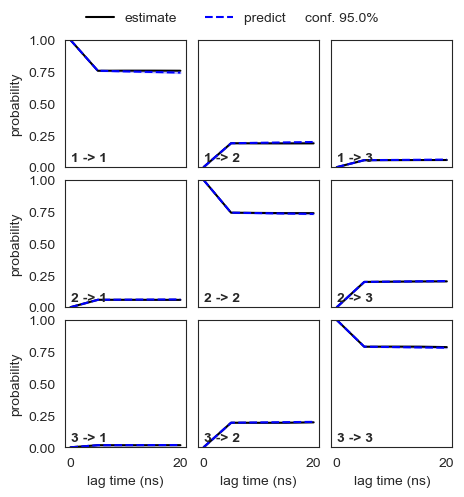

In [29]:
nstates = 3
cktest = msm.cktest(nstates, mlags=5)
pyemma.plots.plot_cktest(cktest, figsize=(5, 5), dt=0.01, units='ns')

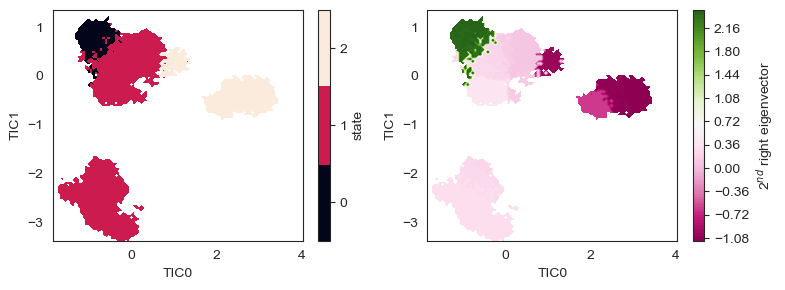

In [46]:
# Plot state map and 2nd right eigenvector
active_traj=np.concatenate(msm.discrete_trajectories_active)
metastable_traj=msm.metastable_assignments[active_traj[active_traj!=-1]]
eigen=msm.eigenvectors_right()[active_traj[active_traj!=-1],1]

fig,ax=plt.subplots(1,2,figsize=(4*2,3))
pyemma.plots.plot_state_map(tica_cnc[active_traj!=-1,0],tica_cnc[active_traj!=-1,1],metastable_traj,ax=ax[0])
pyemma.plots.plot_contour(tica_cnc[active_traj!=-1,0],tica_cnc[active_traj!=-1,1],eigen,ax=ax[1],cbar=True,
                          cbar_label="2$^{nd}$ right eigenvector",cmap="PiYG",mask=True)
for i in range(2):
    ax[i].set_xlabel("TIC0")
    ax[i].set_ylabel("TIC1")


fig.tight_layout()

In [113]:
# Bootstrapping without replacement, using 80% of the trajectories.
# Do 100 rounds for populations and MFPTs; 10 rounds for CK tests.

rounds,percentage=100,0.9
dtrajs=np.array(msm.dtrajs_active)

mfpt,ck=[],[]
cpop,mpop=[],[]
for rnd in range(rounds):
    tin=time.time()
    # Sample trajectories and build a "reduced" MSM (rMSM)
    sample=np.random.choice([i for i in range(dtrajs.shape[0])],math.ceil(dtrajs.shape[0]*percentage),replace=False)
    rmsm=pyemma.msm.estimate_markov_model(list(dtrajs[sample]),lag=msm.lag,dt_traj="{:1.3f} ns".format(stept),count_mode="effective")
    print("Active state fraction:",rmsm.active_state_fraction)
    print("Random {} Excluded trajectories: ".format(rnd+1),sorted([i for i in trajs if i not in np.array(trajs)[sample]]))
    # Compute populations and MFPTs within the MSM metastable sets
    cset=[[i for i,j in enumerate(rmsm.active_set) if j in msm.active_set[m]] for m in msm.metastable_sets]
    cpop.append([rmsm.pi[s].sum() for s in cset])
    mfpt.append([rmsm.mfpt(cset[p[0]],cset[p[1]]) for p in itertools.permutations([i for i in range(msm.n_metastable)], 2)])
    mpop.append([(rmsm.pi*state).sum() for state in msm.metastable_memberships[np.isin(msm.active_set,rmsm.active_set),:].T])
    if rnd%(rounds*0.1)==0:
        # Compute CK test using the MSM memberships
        ck.append(rmsm.cktest(msm.n_metastable,memberships=msm.metastable_memberships[np.isin(msm.active_set,rmsm.active_set)],show_progress=False))
    #print("Time (s): {:1.1f}".format((time.time()-tin)))
    #print("")

/tmp/ipykernel_14098/2629534557.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dtrajs=np.array(msm.dtrajs_active)


Active state fraction: 1.0
Random 1 Excluded trajectories:  [2, 13]
Active state fraction: 1.0
Random 2 Excluded trajectories:  [1, 22]
Active state fraction: 1.0
Random 3 Excluded trajectories:  [1, 21]
Active state fraction: 1.0
Random 4 Excluded trajectories:  [2, 20]
Active state fraction: 1.0
Random 5 Excluded trajectories:  [1, 8]
Active state fraction: 1.0
Random 6 Excluded trajectories:  [2, 7]
Active state fraction: 1.0
Random 7 Excluded trajectories:  [4, 19]
Active state fraction: 1.0
Random 8 Excluded trajectories:  [4, 19]
Active state fraction: 1.0
Random 9 Excluded trajectories:  [3, 10]
Active state fraction: 1.0
Random 10 Excluded trajectories:  [4, 5]
Active state fraction: 1.0
Random 11 Excluded trajectories:  [12, 16]
Active state fraction: 1.0
Random 12 Excluded trajectories:  [2, 18]
Active state fraction: 1.0
Random 13 Excluded trajectories:  [18, 19]
Active state fraction: 1.0
Random 14 Excluded trajectories:  [11, 20]
Active state fraction: 1.0
Random 15 Exclud

In [114]:
# Save bootstrapping data
subprocess.call("mkdir ./models",shell=True)
np.savez("./models/2dri-rip_msm-bootstrapping.npz",
         cpop=cpop,mpop=mpop,mfpt=mfpt,
         lags=ck[0].lagtimes*stept,
         prediction=[t.predictions for t in ck],
         estimate=[t.estimates for t in ck])

mkdir: cannot create directory ‘./models’: File exists


/home/chenlin/anaconda3/envs/pyemma/lib/python3.9/site-packages/msmtools/util/statistics.py:56: UserWarning: confidence interval for constant data is not meaningful
  warnings.warn('confidence interval for constant data is not meaningful')


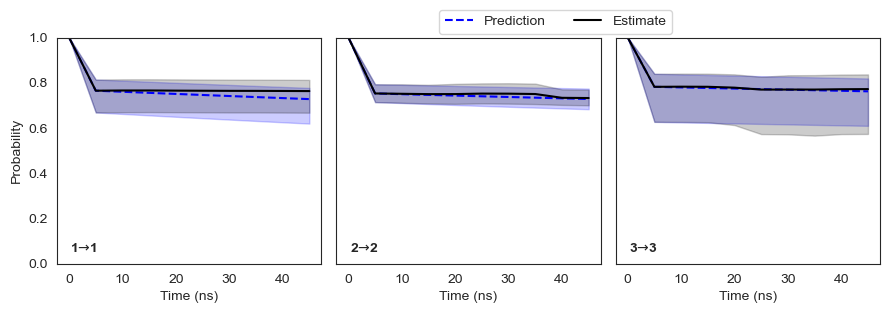

In [115]:
# Plot CK test
bootstrap=np.load("./models/2dri-rip_msm-bootstrapping.npz")
fig,ax=plt.subplots(1,3,figsize=(3*3,3),sharey=True)
for i in range(bootstrap["prediction"].shape[-1]):
    lwb,upb=msmtools.util.statistics.confidence_interval(bootstrap["prediction"][:,:,i,i])
    ax[i].plot(bootstrap["lags"],np.mean(bootstrap["prediction"][:,:,i,i],axis=0),c="blue",ls="dashed",label="Prediction")
    ax[i].fill_between(bootstrap["lags"],lwb,upb,color="blue",alpha=0.2)
    lwb,upb=msmtools.util.statistics.confidence_interval(bootstrap["estimate"][:,:,i,i])
    ax[i].plot(bootstrap["lags"],np.mean(bootstrap["estimate"][:,:,i,i],axis=0),c="black",label="Estimate")
    ax[i].fill_between(bootstrap["lags"],lwb,upb,color="black",alpha=0.2)
    ax[i].set_ylim(0,1)
    ax[i].set_xlabel("Time (ns)")
    ax[i].text(0.05,0.05,r"{}$\to${}".format(i+1,i+1),transform=ax[i].transAxes,weight="bold")
handles,labels=ax[0].get_legend_handles_labels()
legend=fig.legend(handles,labels,ncol=2,bbox_to_anchor=[0.76,1.05])
ax[0].set_ylabel("Probability")
fig.tight_layout()

In [116]:
# Population statistics
pop_df=pd.DataFrame(bootstrap["cpop"],columns=["State {}".format(i) for i in range(msm.n_metastable)])
print("Population:")
print(np.round(pop_df.describe(),2))

Population:
       State 0  State 1  State 2
count   100.00   100.00   100.00
mean      0.11     0.54     0.35
std       0.02     0.07     0.08
min       0.03     0.41     0.05
25%       0.10     0.49     0.29
50%       0.11     0.52     0.38
75%       0.12     0.59     0.41
max       0.16     0.78     0.49


In [117]:
# MFPT statistics
mfpt_df=pandas.DataFrame(bootstrap["mfpt"],columns=["{} to {}".format(p[0],p[1]) for p in itertools.permutations([i for i in range(msm.n_metastable)])])
print("MFPT (ns):")
print(np.round(mfpt_df.describe(),1))

MFPT (ns):
       0 to 1   0 to 2   1 to 0   1 to 2   2 to 0  2 to 1
count   100.0    100.0    100.0    100.0    100.0   100.0
mean    712.5   2486.3   4481.0   1788.2   5413.1   911.4
std     173.6   2487.0   1285.3   2478.5   1287.5   157.1
min     226.7   1419.6   2637.8   1048.7   3755.1   452.0
25%     682.5   1906.0   3766.4   1251.9   4745.7   869.9
50%     701.3   2034.1   4438.8   1338.0   5383.5   926.3
75%     732.9   2465.2   4642.9   1405.2   5578.6   985.2
max    1418.3  26377.3  10312.9  25661.5  11208.2  1698.4


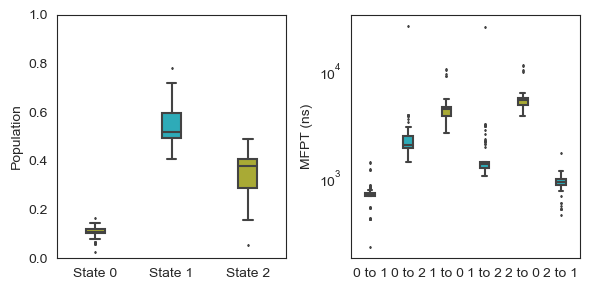

In [119]:
# Plot populations and MFPTs
fig,ax=plt.subplots(1,2,figsize=(3*2,3))
seaborn.boxplot(data=pop_df,palette=("C8","C9"),ax=ax[0],width=0.25,fliersize=1)
seaborn.boxplot(data=mfpt_df,palette=("C8","C9"),ax=ax[1],width=0.25,fliersize=1)
ax[0].set_ylim(0,1)
ax[0].set_ylabel("Population",fontsize=10)
ax[1].semilogy()
ax[1].set_ylabel("MFPT (ns)",fontsize=10)
fig.tight_layout()

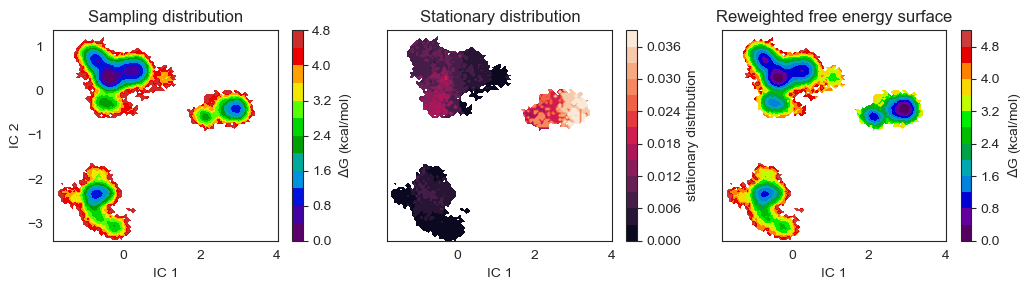

In [120]:
fig, axes = plt.subplots(1, 3, figsize=(10.5, 3), sharex=True, sharey=True)

pyemma.plots.plot_free_energy(
    tica_cnc[:,0],
    tica_cnc[:,1],
    ax=axes[0],
    cbar=True,
    kT=0.6,
    cbar_label=r"$\Delta$G (kcal/mol)",
    ncountours=12)


pyemma.plots.plot_contour(
    *tica_cnc[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[1],
    mask=True,
    cbar_label='stationary distribution',
    ncontours=12)


pyemma.plots.plot_free_energy(
    *tica_cnc[:, :2].T,
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[2],
    legacy=True,
    kT=0.6,
    cbar_label=r"$\Delta$G (kcal/mol)",
    ncountours=12)


for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Sampling distribution', fontsize=12)
axes[1].set_title('Stationary distribution', fontsize=12)
axes[2].set_title('Reweighted free energy surface',fontsize=12)
fig.tight_layout()

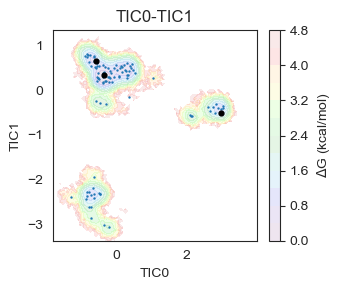

In [121]:
# Select most representative center of each state
select=[msm.active_set[mset[msm.pi[mset].argmax()]] for mset in msm.metastable_sets]

fig,ax=plt.subplots(figsize=(3.5,3))
pyemma.plots.plot_free_energy(tica_cnc[:,0],tica_cnc[:,1],ax=ax,cbar=True,kT=0.6,alpha=0.1,
                              cbar_label=r"$\Delta$G (kcal/mol)",ncountours=12)
ax.scatter(km.clustercenters[:,0],km.clustercenters[:,1],c="C0",s=0.5)
ax.scatter(km.clustercenters[select,0],km.clustercenters[select,1],c="black",s=12)
ax.set_title("TIC0-TIC1")
ax.set_xlabel("TIC0")
ax.set_ylabel("TIC1")
fig.tight_layout()

In [124]:
# Save samples for hbond and VMD
subprocess.call("mkdir ./metastable_states",shell=True)

representative_take=km.sample_indexes_by_cluster(select,1)
for i,t in enumerate(representative_take):
    pyemma.coordinates.save_trajs(feat_data,t[:1],outfiles=[f"./metastable_states/2dri-rip_ackbone_state{i}.pdb"])

distributions_take=msm.sample_by_distributions(msm.metastable_distributions, 10000)
for i,t in enumerate(distributions_take):
    pyemma.coordinates.save_trajs(feat_data,t,outfiles=["./metastable_states/2dri-rip_ackbone_state{}.xtc".format(i)])



mkdir: cannot create directory ‘./metastable_states’: File exists
